In [88]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [93]:
X, y = pd.read_csv('./data/heart_X.csv'), pd.read_csv('./data/heart_y.csv')

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=32, shuffle=True)

train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

train_y = train_y['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)
test_y = test_y['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)

train_X = train_X.rename(columns=lambda x: re.sub('[^A-Za-z0-9]+', '', x))
test_X = test_X.rename(columns=lambda x: re.sub('[^A-Za-z0-9]+', '', x))

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(43796, 50)
(43796,)
(10950, 50)
(10950,)


In [94]:
dtc = DecisionTreeClassifier(random_state=32)
dtc.fit(train_X, train_y)
dtc.score(test_X, test_y)

0.6678538812785388

In [95]:
rfc = RandomForestClassifier(random_state=32)
rfc.fit(train_X, train_y)
rfc.score(test_X, test_y)

0.7374429223744292

In [96]:
lgbm = LGBMClassifier(random_state=32)
lgbm.fit(train_X, train_y)
lgbm.score(test_X, test_y)

0.768310502283105

In [107]:
# Confusion Matrix 반환 함수
def _get_confusion_mat(model, _x, _y):
    _y_pred = model.predict(_x)
    try:
        _y = _y if type(_y) == np.ndarray else _y.values.reval()
    except AttributeError:
        _y = _y.values

    confusion_mat = pd.crosstab(_y, _y_pred,
                                rownames=['Actual'],
                                colnames=['Predicted'])
    return confusion_mat

# Confusion Report 반환 함수
def _get_confusion_report(model, _x, _y):
    _y_pred = model.predict(_x)
    return classification_report(_y, _y_pred)

# Confusion Matrix를 그려주는 함수
def print_confusion_mat(model, _x, _y):
    # confusion matrix 산출
    confusion_mat = _get_confusion_mat(model, _x, _y)

    # confusion matrix 시각화
    fig = sns.heatmap(confusion_mat,
                      annot=True,
                      fmt='d',
                      cmap="YlGnBu")
    fig.set_title('Confusion Matrix')
    plt.show()

    # 여러 측정지표 확인
    print('\n[Confusion Report]\n\n', _get_confusion_report(model, _x, _y))

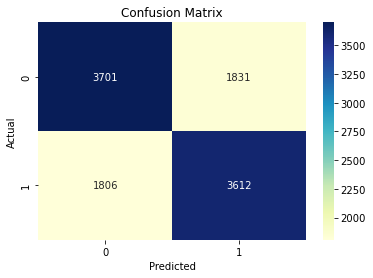


[Confusion Report]

               precision    recall  f1-score   support

           0       0.67      0.67      0.67      5532
           1       0.66      0.67      0.67      5418

    accuracy                           0.67     10950
   macro avg       0.67      0.67      0.67     10950
weighted avg       0.67      0.67      0.67     10950



In [108]:
# Confusion Matrix 출력
print_confusion_mat(dtc, test_X, test_y)

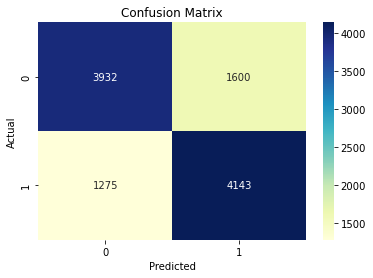


[Confusion Report]

               precision    recall  f1-score   support

           0       0.76      0.71      0.73      5532
           1       0.72      0.76      0.74      5418

    accuracy                           0.74     10950
   macro avg       0.74      0.74      0.74     10950
weighted avg       0.74      0.74      0.74     10950



In [99]:
# Confusion Matrix 출력
print_confusion_mat(rfc, test_X, test_y)

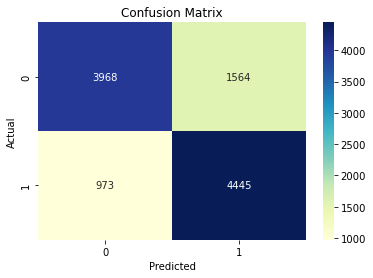


[Confusion Report]

               precision    recall  f1-score   support

           0       0.80      0.72      0.76      5532
           1       0.74      0.82      0.78      5418

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [100]:
# Confusion Matrix 출력
print_confusion_mat(lgbm, test_X, test_y)